# Exploratory Data Analysis

Using data from Taarifa and the Tanzanian Ministry of Water, we aim to predict which pumps are functional, which require repairs, and which are not operational. To begin, we perform exploratory data analysis.

## Import Packages

In [1]:
# For data handling
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This sets the plot style
# to have a grid on a white background
sns.set_style('whitegrid')

## Load Data and Initial Inspection

In [2]:
# Load data
X = pd.read_csv('training_set_values.csv')
y = pd.read_csv('training_set_labels.csv')

# Combine label data with feature data
df = X.merge(y, how = 'inner', on = 'id')

In [3]:
# Randomly sample 10 rows from the df
df.sample(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
30875,37478,50.0,2013-02-11,World Bank,1445,PIT COOPERATION LTD,34.383674,-4.482832e+00,Dp 2,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
1603,37655,50.0,2011-04-16,World Bank,0,Ma,36.968012,-6.212625e+00,Kwa Waziri,0,...,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
15064,5841,0.0,2013-01-22,Dwsp,0,DWE,0.000000,-2.000000e-08,Mwasheka,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
10850,48959,1000.0,2011-02-21,Danida,1754,DANID,35.463821,-8.055644e+00,none,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
9655,17739,0.0,2011-04-02,World Bank,200,World,38.185871,-6.821619e+00,Zahanati,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,non functional
55147,52018,0.0,2012-10-14,Total Land Care,0,Total land care,32.228966,-5.075550e+00,Mrisho Mihambo,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
37565,4727,0.0,2013-02-08,Unhcr,1297,TCRS,30.880133,-3.382278e+00,Jonason,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
20075,64222,0.0,2013-03-22,Ministry Of Water,1351,DWE,36.687447,-2.724940e+00,Kwa Mnadani,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,cattle trough,cattle trough,functional
21598,51131,0.0,2011-02-22,Msigw,1870,Msig,35.501615,-8.347504e+00,none,0,...,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional
57789,34737,0.0,2011-07-29,Plan International,0,Plan Internationa,0.000000,-2.000000e-08,Bombani,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [4]:
# Summary of df
print("================================")
print("         Summary of df          ")
print("================================")
print()
df.info()

         Summary of df          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code       

In [5]:
# Check the unique counts of the respective columns.
# This will help identify categorical and non-categorical data.
df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

## EDA

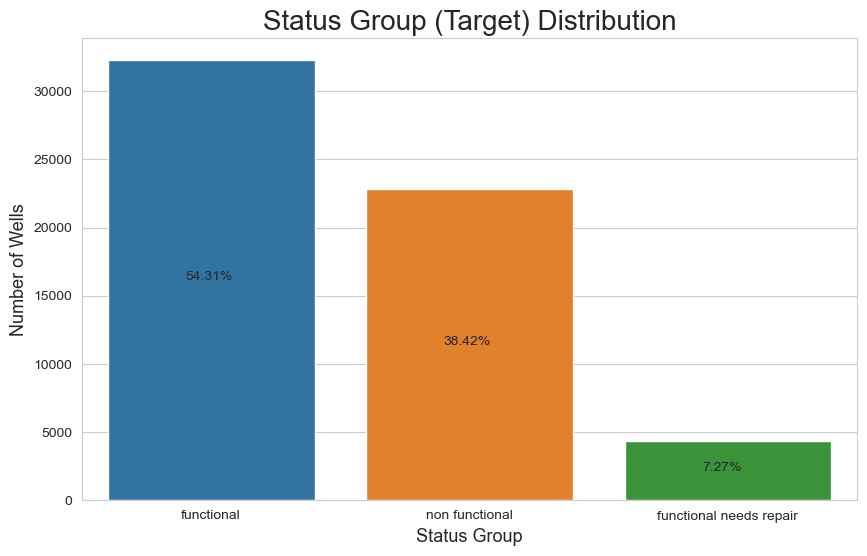

In [6]:
# Create a plot of the target variable.
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df['status_group'])
ax.set_xlabel('Status Group', fontsize = 13)
ax.set_ylabel('Number of Wells', fontsize = 13)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()*100/len(df)), (p.get_x()+0.3, p.get_height()*0.5))
plt.title('Status Group (Target) Distribution', fontsize = 20)
plt.show()

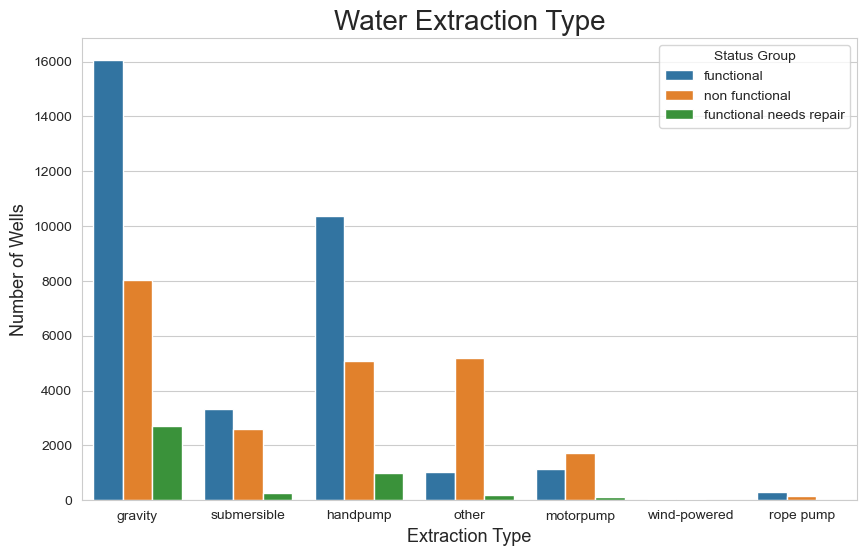

In [7]:
# Water Extraction Type vs Status Group

plt.figure(figsize=(10, 6))
sns.countplot(x = df['extraction_type_class'], hue = df['status_group'], data = df)
plt.title('Water Extraction Type', fontsize = 20)
plt.xlabel('Extraction Type', fontsize = 13)
plt.ylabel('Number of Wells', fontsize = 13)
plt.legend(title = 'Status Group')
plt.show()

We observe that 'gravity' and 'handpump' wells have lower failure rates compared to other types of pumps. Gravity and handpump wells likely have fewer mechanical components, making them less prone to breakdowns. Their simpler design might also require less maintenance and be more resilient in challenging environmental conditions.

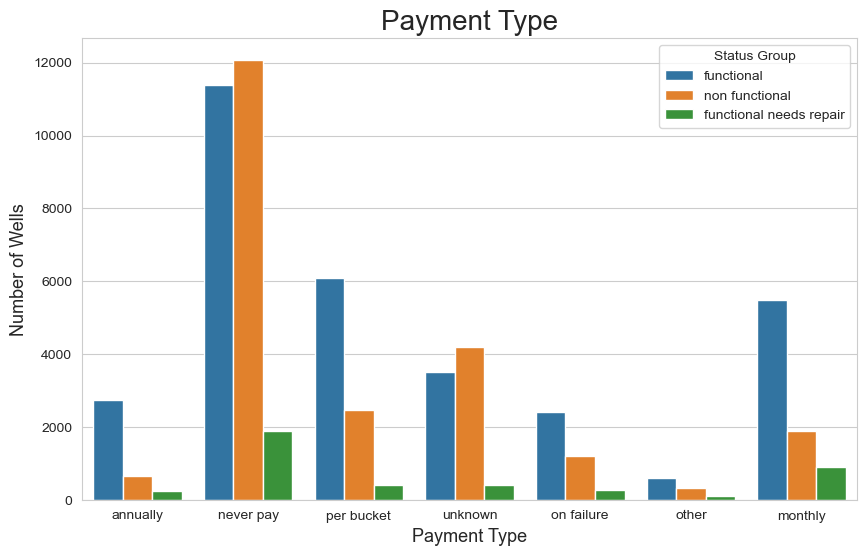

In [8]:
# Payment Type vs Status Group

plt.figure(figsize=(10, 6))
sns.countplot(x = df['payment_type'], hue = df['status_group'], data = df)
plt.title('Payment Type', fontsize = 20)
plt.xlabel('Payment Type', fontsize = 13)
plt.ylabel('Number of Wells', fontsize = 13)
plt.legend(title = 'Status Group')
plt.show()

Pumps that provide free water tend to fail more frequently than others.

In [9]:
df['Water Quality'] = np.where(df['quality_group'] == 'good', 'Good', 'Bad')

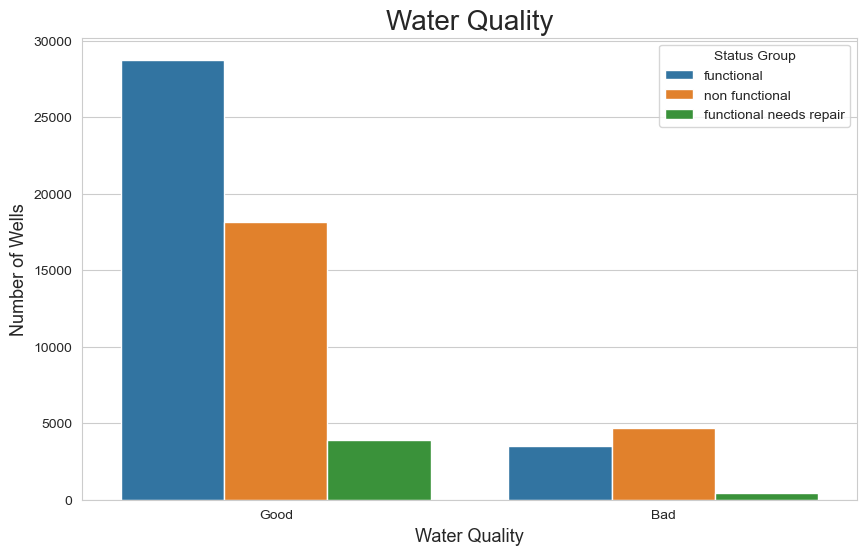

In [10]:
# Water Quality vs Status Group

plt.figure(figsize=(10, 6))
sns.countplot(x = df['Water Quality'], hue = df['status_group'], data = df)
plt.title('Water Quality', fontsize = 20)
plt.xlabel('Water Quality', fontsize = 13)
plt.ylabel('Number of Wells', fontsize = 13)
plt.legend(title = 'Status Group')
plt.show()

Most wells have good water quality; however, roughly 18,000 wells with good water quality are non-functional.

(len(df.loc[(df['Water Quality'] == 'Good') & (df['status_group'] == 'non functional')]) = 18154)

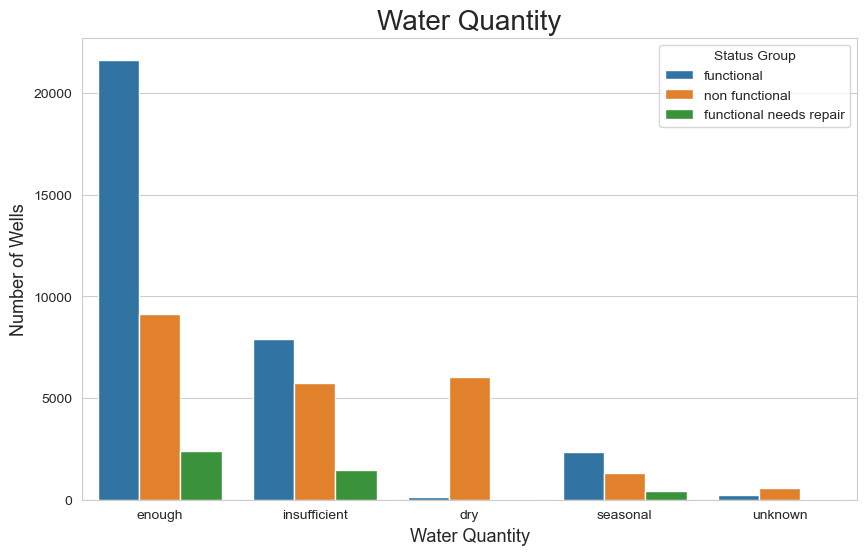

In [11]:
# Water Quantity vs Status Group

plt.figure(figsize=(10, 6))
sns.countplot(x = df['quantity'], hue = df['status_group'], data = df)
plt.title('Water Quantity', fontsize = 20)
plt.xlabel('Water Quantity', fontsize = 13)
plt.ylabel('Number of Wells', fontsize = 13)
plt.legend(title = 'Status Group')
plt.show()

Approximately 9,000 wells have adequate water availability but are non-functional.

(len(df.loc[(df['quantity'] == 'enough') & (df['status_group'] == 'non functional')]) = 9138)

In the next notebook (Data Preprocessing), we clean the data by handling missing values, encoding categorical variables, and performing feature selection.